In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\egor\\J_NOTEBOOKS\\ANU_Proj'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '12_11_Aff_N_params.ipynb',
 'Aff_match.ipynb',
 'aff_matching_statistics.ipynb',
 'quyery_stats.ipynb',
 'ROR_id_match.ipynb',
 'test.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [199]:
fname="E:\PYTHON_work_learn\Python_work\Anu_Project\CSV_output\\"+"institutions_ROR_id.csv"

In [200]:
a=list(df.columns)
a=a[1:]
a

['chosen',
 'score',
 'matching_type',
 'substring',
 'ROR_name',
 'id_institution',
 'abbreviation',
 'name',
 'city',
 'contact',
 'country',
 'fax',
 'phone',
 'state',
 'street',
 'uri',
 'uri_semantic',
 'id_institution_type',
 'id_user_created']

In [201]:
fname

'E:\\PYTHON_work_learn\\Python_work\\Anu_Project\\CSV_output\\institutions_ROR_id.csv'

In [203]:
a=df.columns[1:]

In [204]:
a

Index(['qROR_id', 'id_institution', 'abbreviation', 'name', 'city', 'contact',
       'country', 'fax', 'phone', 'state', 'street', 'uri', 'uri_semantic',
       'id_institution_type', 'id_user_created'],
      dtype='object')

In [202]:
df=pd.read_csv(fname)

In [205]:
df=pd.read_csv(fname,usecols=a)

In [206]:
df

,qROR_id,id_institution,abbreviation,name,city,contact,country,fax,phone,state,street,uri,uri_semantic,id_institution_type,id_user_created
0,NaN,1,AWI@FRIGOROPA,Polarstern core repository,27572 Bremerhaven,hannes.grobe@awi.de,Germany,+49 471 4831 1149,+49 471 4831 1220,NaN,Kühlhausstrasse 9,http://www.awi-bremerhaven.de/GEO/CoreRepository/,NaN,NaN,7.0
1,https://ror.org/04ers2y35,4,GeoB,"Department of Geosciences, Bremen University",28359 Bremen,NaN,Germany,+49 421 218 3116,+49 421 218 3585,NaN,Klagenfurter Strasse,http://www.geo.uni-bremen.de/page.php?langid=EN,NaN,NaN,7.0
2,https://ror.org/01xtthb56,5,GEOOSLO,"Department of Geosciences, University of Oslo",N-0316 Oslo 3,NaN,Norway,+47 22 85 4215,+47 22 85 6656,NaN,P.O. Box 1047 Blindern,http://www.geo.uio.no/english/,NaN,NaN,7.0
3,https://ror.org/02h2x0161,6,IFM-GEOMAR,IFM-GEOMAR Leibniz-Institute of Marine Science...,24148 Kiel,wbrueckmann@ifm-geomar.de,Germany,+49 431 600 2941,+49 431 600 2500 Sec,NaN,Wischhofstrasse 1-3,http://www.geomar.de,NaN,NaN,7.0
4,https://ror.org/01y9bpm73,8,IMGP,"Göttinger Zentrum für Geowissenschaften, Unive...",37077 Göttingen,NaN,Germany,+49 551 397 996,+49 551 397 900,NaN,Goldschmidt-Strasse 3,http://www.imgp.gwdg.de/,NaN,NaN,7.0
5,https://ror.org/04v76ef78,9,GIK,"Geologisch-Paläontologisches Institut, Christi...",24098 Kiel,name changed to Inst. für Geowissenschaften,Germany,NaN,NaN,NaN,NaN,http://www.ifg.uni-kiel.de/,NaN,0.0,7.0
6,https://ror.org/01se4f844,11,IES,"Institute of Geography and Earth Sciences, Uni...","Aberystwyth, SY23 3DB, Wales",glawww@aber.ac.uk,United Kingdom,+44 1970 622 780,+44 1970 622 781,NaN,Ceredigion,http://www.aber.ac.uk/~gbb/chome.html,NaN,NaN,7.0
7,NaN,13,RGD,"Rijks Geologische Dienst, Marine Geology Depar...",2000 AD Haarlem,NaN,The Netherlands,NaN,023-319362,NaN,P.O. Box 157,NaN,NaN,NaN,7.0
8,https://ror.org/02dvf9b44,15,IUPH,"Institut für Umweltphysik, Heidelberger Akadem...",69120 Heidelberg,Bernd Kromer,Germany,+49 6221 546 405,+49 6221 546 357,NaN,Im Neuenheimer Feld 366,http://www.uphys.uni-heidelberg.de/,NaN,NaN,7.0
9,TypeError occured while reading name or country,17,n_g,not_given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [207]:
len(df)

9376

Lets create list of aff params

In [127]:
afflist=df.loc[5].drop(labels=['qROR_id','id_institution_type','id_user_created','phone','fax','id_institution'])
afflist

abbreviation                                                  GIK
name            Geologisch-Paläontologisches Institut, Christi...
city                                                   24098 Kiel
contact               name changed to Inst. für Geowissenschaften
country                                                   Germany
state                                                         NaN
street                                                        NaN
uri                                   http://www.ifg.uni-kiel.de/
uri_semantic                                                  NaN
Name: 5, dtype: object

In [128]:
len(afflist)

9

## so max number of params=9

Now we will throw out non str params

In [129]:
afflistF=[s for s in afflist if type(s)==str]
afflistF

['GIK',
 'Geologisch-Paläontologisches Institut, Christian-Albrechts-Universität, Kiel',
 '24098 Kiel',
 'name changed to Inst. für Geowissenschaften',
 'Germany',
 'http://www.ifg.uni-kiel.de/']

In [130]:
len(afflistF)

6

Now lets create a list of number of Affparams and iterate

In [208]:
def pcalc(niter):
    Nparams=[]
    Afflist=[]
    for s in range(0,niter):
        afflist=df.loc[s].drop(labels=['qROR_id','id_institution_type','id_user_created','phone','fax','id_institution'])
        afflistF=[s for s in afflist if type(s)==str]
        Afflist.append(afflistF)
        Nparams.append(len(afflistF))
#         print("Iteration N{}".format(s))
#         print(afflistF)
#         print("N of params is {}".format(len(afflistF)))
#         print("█"*100)
    return Nparams,Afflist

In [217]:
Nparams,Afflist=pcalc(9376)

In [210]:
len(Nprarmsdd)

NameError: name 'Nprarms' is not defined

In [218]:
len(Afflist)

9376

In [219]:
import matplotlib.pyplot as plt

(array([1.03607996e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.44661141e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.18442223e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.91348732e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.91979522e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.94423452e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.95587518e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.04729400e-03]),
 array([1.  , 1.14, 1.28, 1.42, 1.56, 1.7 , 1.84, 1.98, 2.12, 2.26, 2.4 ,
        2.54, 2.68, 

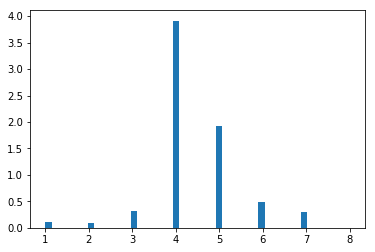

In [220]:
plt.hist(Nparams,bins=50,density=True)

So now we have list of affiliation parameters=Afflist and length of this list=Nparams


Lets insert these columns into thr AffROR_dataframe

In [226]:
fname="E:\PYTHON_work_learn\Python_work\Anu_Project\CSV_output\\"+"institutions_Affil_match.csv"
fname

'E:\\PYTHON_work_learn\\Python_work\\Anu_Project\\CSV_output\\institutions_Affil_match.csv'

In [230]:
a=df.columns[2:]

In [231]:
a

Index(['aROR_id', 'chosen', 'score', 'matching_type', 'substring', 'ROR_name',
       'id_institution', 'abbreviation', 'name', 'city', 'contact', 'country',
       'fax', 'phone', 'state', 'street', 'uri', 'uri_semantic',
       'id_institution_type', 'id_user_created'],
      dtype='object')

In [232]:
df=pd.read_csv(fname,usecols=a)

In [227]:
df=pd.read_csv(fname)

In [233]:
df

,aROR_id,chosen,score,matching_type,substring,ROR_name,id_institution,abbreviation,name,city,contact,country,fax,phone,state,street,uri,uri_semantic,id_institution_type,id_user_created
0,https://ror.org/032e6b942,True,1.00,ACRONYM,AWI,Alfred Wegener Institute for Polar and Marine ...,1,AWI@FRIGOROPA,Polarstern core repository,27572 Bremerhaven,hannes.grobe@awi.de,Germany,+49 471 4831 1149,+49 471 4831 1220,NaN,Kühlhausstrasse 9,http://www.awi-bremerhaven.de/GEO/CoreRepository/,NaN,NaN,7.0
1,https://ror.org/04ers2y35,True,0.92,COMMON TERMS,Bremen University,University of Bremen,4,GeoB,"Department of Geosciences, Bremen University",28359 Bremen,NaN,Germany,+49 421 218 3116,+49 421 218 3585,NaN,Klagenfurter Strasse,http://www.geo.uni-bremen.de/page.php?langid=EN,NaN,NaN,7.0
2,https://ror.org/01xtthb56,True,1.00,PHRASE,University of Oslo,University of Oslo,5,GEOOSLO,"Department of Geosciences, University of Oslo",N-0316 Oslo 3,NaN,Norway,+47 22 85 4215,+47 22 85 6656,NaN,P.O. Box 1047 Blindern,http://www.geo.uio.no/english/,NaN,NaN,7.0
3,https://ror.org/02h2x0161,True,1.00,COMMON TERMS,IFM-GEOMAR,GEOMAR Helmholtz Centre for Ocean Research Kiel,6,IFM-GEOMAR,IFM-GEOMAR Leibniz-Institute of Marine Science...,24148 Kiel,wbrueckmann@ifm-geomar.de,Germany,+49 431 600 2941,+49 431 600 2500 Sec,NaN,Wischhofstrasse 1-3,http://www.geomar.de,NaN,NaN,7.0
4,https://ror.org/01y9bpm73,False,0.86,PHRASE,Universität Göttingen,University of Göttingen,8,IMGP,"Göttinger Zentrum für Geowissenschaften, Unive...",37077 Göttingen,NaN,Germany,+49 551 397 996,+49 551 397 900,NaN,Goldschmidt-Strasse 3,http://www.imgp.gwdg.de/,NaN,NaN,7.0
5,https://ror.org/04v76ef78,True,1.00,PHRASE,Christian-Albrechts-Universität,Kiel University,9,GIK,"Geologisch-Paläontologisches Institut, Christi...",24098 Kiel,name changed to Inst. für Geowissenschaften,Germany,NaN,NaN,NaN,NaN,http://www.ifg.uni-kiel.de/,NaN,0.0,7.0
6,https://ror.org/002gsek34,False,1.00,ACRONYM,IES,Institute for Employment Studies,11,IES,"Institute of Geography and Earth Sciences, Uni...","Aberystwyth, SY23 3DB, Wales",glawww@aber.ac.uk,United Kingdom,+44 1970 622 780,+44 1970 622 781,NaN,Ceredigion,http://www.aber.ac.uk/~gbb/chome.html,NaN,NaN,7.0
7,https://ror.org/00wkygr69,False,0.62,FUZZY,Marine Geology Department,Maine Department of Marine Resources,13,RGD,"Rijks Geologische Dienst, Marine Geology Depar...",2000 AD Haarlem,NaN,The Netherlands,NaN,023-319362,NaN,P.O. Box 157,NaN,NaN,NaN,7.0
8,https://ror.org/02dvf9b44,True,1.00,PHRASE,Heidelberger Akademie der Wissenschaften,Heidelberg Academy of Sciences and Humanities,15,IUPH,"Institut für Umweltphysik, Heidelberger Akadem...",69120 Heidelberg,Bernd Kromer,Germany,+49 6221 546 405,+49 6221 546 357,NaN,Im Neuenheimer Feld 366,http://www.uphys.uni-heidelberg.de/,NaN,NaN,7.0
9,https://ror.org/050draa26,False,0.48,FUZZY,n_g not_given,NRG Oncology,17,n_g,not_given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


Lets insert Afflist and Nparams into Dataframe

In [195]:
len(Nparams)

9375

In [196]:
len(df)

9376

In [242]:
for s in range(0,len(Afflist)):
    if  "not_given" in Afflist[s]:
        print(s)

9


In [234]:
df.insert(1,"Nparams",Nparams)

In [235]:
df

,aROR_id,Nparams,chosen,score,matching_type,substring,ROR_name,id_institution,abbreviation,name,...,contact,country,fax,phone,state,street,uri,uri_semantic,id_institution_type,id_user_created
0,https://ror.org/032e6b942,7,True,1.00,ACRONYM,AWI,Alfred Wegener Institute for Polar and Marine ...,1,AWI@FRIGOROPA,Polarstern core repository,...,hannes.grobe@awi.de,Germany,+49 471 4831 1149,+49 471 4831 1220,NaN,Kühlhausstrasse 9,http://www.awi-bremerhaven.de/GEO/CoreRepository/,NaN,NaN,7.0
1,https://ror.org/04ers2y35,6,True,0.92,COMMON TERMS,Bremen University,University of Bremen,4,GeoB,"Department of Geosciences, Bremen University",...,NaN,Germany,+49 421 218 3116,+49 421 218 3585,NaN,Klagenfurter Strasse,http://www.geo.uni-bremen.de/page.php?langid=EN,NaN,NaN,7.0
2,https://ror.org/01xtthb56,6,True,1.00,PHRASE,University of Oslo,University of Oslo,5,GEOOSLO,"Department of Geosciences, University of Oslo",...,NaN,Norway,+47 22 85 4215,+47 22 85 6656,NaN,P.O. Box 1047 Blindern,http://www.geo.uio.no/english/,NaN,NaN,7.0
3,https://ror.org/02h2x0161,7,True,1.00,COMMON TERMS,IFM-GEOMAR,GEOMAR Helmholtz Centre for Ocean Research Kiel,6,IFM-GEOMAR,IFM-GEOMAR Leibniz-Institute of Marine Science...,...,wbrueckmann@ifm-geomar.de,Germany,+49 431 600 2941,+49 431 600 2500 Sec,NaN,Wischhofstrasse 1-3,http://www.geomar.de,NaN,NaN,7.0
4,https://ror.org/01y9bpm73,6,False,0.86,PHRASE,Universität Göttingen,University of Göttingen,8,IMGP,"Göttinger Zentrum für Geowissenschaften, Unive...",...,NaN,Germany,+49 551 397 996,+49 551 397 900,NaN,Goldschmidt-Strasse 3,http://www.imgp.gwdg.de/,NaN,NaN,7.0
5,https://ror.org/04v76ef78,6,True,1.00,PHRASE,Christian-Albrechts-Universität,Kiel University,9,GIK,"Geologisch-Paläontologisches Institut, Christi...",...,name changed to Inst. für Geowissenschaften,Germany,NaN,NaN,NaN,NaN,http://www.ifg.uni-kiel.de/,NaN,0.0,7.0
6,https://ror.org/002gsek34,7,False,1.00,ACRONYM,IES,Institute for Employment Studies,11,IES,"Institute of Geography and Earth Sciences, Uni...",...,glawww@aber.ac.uk,United Kingdom,+44 1970 622 780,+44 1970 622 781,NaN,Ceredigion,http://www.aber.ac.uk/~gbb/chome.html,NaN,NaN,7.0
7,https://ror.org/00wkygr69,5,False,0.62,FUZZY,Marine Geology Department,Maine Department of Marine Resources,13,RGD,"Rijks Geologische Dienst, Marine Geology Depar...",...,NaN,The Netherlands,NaN,023-319362,NaN,P.O. Box 157,NaN,NaN,NaN,7.0
8,https://ror.org/02dvf9b44,7,True,1.00,PHRASE,Heidelberger Akademie der Wissenschaften,Heidelberg Academy of Sciences and Humanities,15,IUPH,"Institut für Umweltphysik, Heidelberger Akadem...",...,Bernd Kromer,Germany,+49 6221 546 405,+49 6221 546 357,NaN,Im Neuenheimer Feld 366,http://www.uphys.uni-heidelberg.de/,NaN,NaN,7.0
9,https://ror.org/050draa26,2,False,0.48,FUZZY,n_g not_given,NRG Oncology,17,n_g,not_given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [243]:
df.insert(2,"Aff_list",Afflist)

In [259]:
df.at[9,'aROR_id']=None

In [331]:
colist=list(df.columns)
len(colist)

22

In [320]:
c=colist[::-1]

In [322]:
c.append('id_institution')

In [324]:
c=c[::-1]

In [328]:
c.pop(9)

'id_institution'

In [332]:
len(c),c

(22,
 ['id_institution',
  'aROR_id',
  'Nparams',
  'Aff_list',
  'chosen',
  'score',
  'matching_type',
  'substring',
  'ROR_name',
  'abbreviation',
  'name',
  'city',
  'contact',
  'country',
  'fax',
  'phone',
  'state',
  'street',
  'uri',
  'uri_semantic',
  'id_institution_type',
  'id_user_created'])

In [334]:
frame=df[c]

In [338]:
frame.columns

Index(['id_institution', 'aROR_id', 'Nparams', 'Aff_list', 'chosen', 'score',
       'matching_type', 'substring', 'ROR_name', 'abbreviation', 'name',
       'city', 'contact', 'country', 'fax', 'phone', 'state', 'street', 'uri',
       'uri_semantic', 'id_institution_type', 'id_user_created'],
      dtype='object')

Now time to write the new csv file

In [341]:
path=os.chdir("E:\PYTHON_work_learn\Python_work\Anu_Project\CSV_output")

In [343]:
frame.to_csv("institutions_Affil_match_final.csv",sep=",")

In [344]:
frame_t=frame

In [345]:
frame_t.set_index('id_institution',inplace=True)

In [349]:
frame_t

,aROR_id,Nparams,chosen,score,matching_type,substring,ROR_name,abbreviation,name,city,contact,country,fax,phone,state,street,uri,uri_semantic,id_institution_type,id_user_created
id_institution,,,,,,,,,,,,,,,,,,,,
1,https://ror.org/032e6b942,7,True,1.00,ACRONYM,AWI,Alfred Wegener Institute for Polar and Marine ...,AWI@FRIGOROPA,Polarstern core repository,27572 Bremerhaven,hannes.grobe@awi.de,Germany,+49 471 4831 1149,+49 471 4831 1220,NaN,Kühlhausstrasse 9,http://www.awi-bremerhaven.de/GEO/CoreRepository/,NaN,NaN,7.0
4,https://ror.org/04ers2y35,6,True,0.92,COMMON TERMS,Bremen University,University of Bremen,GeoB,"Department of Geosciences, Bremen University",28359 Bremen,NaN,Germany,+49 421 218 3116,+49 421 218 3585,NaN,Klagenfurter Strasse,http://www.geo.uni-bremen.de/page.php?langid=EN,NaN,NaN,7.0
5,https://ror.org/01xtthb56,6,True,1.00,PHRASE,University of Oslo,University of Oslo,GEOOSLO,"Department of Geosciences, University of Oslo",N-0316 Oslo 3,NaN,Norway,+47 22 85 4215,+47 22 85 6656,NaN,P.O. Box 1047 Blindern,http://www.geo.uio.no/english/,NaN,NaN,7.0
6,https://ror.org/02h2x0161,7,True,1.00,COMMON TERMS,IFM-GEOMAR,GEOMAR Helmholtz Centre for Ocean Research Kiel,IFM-GEOMAR,IFM-GEOMAR Leibniz-Institute of Marine Science...,24148 Kiel,wbrueckmann@ifm-geomar.de,Germany,+49 431 600 2941,+49 431 600 2500 Sec,NaN,Wischhofstrasse 1-3,http://www.geomar.de,NaN,NaN,7.0
8,https://ror.org/01y9bpm73,6,False,0.86,PHRASE,Universität Göttingen,University of Göttingen,IMGP,"Göttinger Zentrum für Geowissenschaften, Unive...",37077 Göttingen,NaN,Germany,+49 551 397 996,+49 551 397 900,NaN,Goldschmidt-Strasse 3,http://www.imgp.gwdg.de/,NaN,NaN,7.0
9,https://ror.org/04v76ef78,6,True,1.00,PHRASE,Christian-Albrechts-Universität,Kiel University,GIK,"Geologisch-Paläontologisches Institut, Christi...",24098 Kiel,name changed to Inst. für Geowissenschaften,Germany,NaN,NaN,NaN,NaN,http://www.ifg.uni-kiel.de/,NaN,0.0,7.0
11,https://ror.org/002gsek34,7,False,1.00,ACRONYM,IES,Institute for Employment Studies,IES,"Institute of Geography and Earth Sciences, Uni...","Aberystwyth, SY23 3DB, Wales",glawww@aber.ac.uk,United Kingdom,+44 1970 622 780,+44 1970 622 781,NaN,Ceredigion,http://www.aber.ac.uk/~gbb/chome.html,NaN,NaN,7.0
13,https://ror.org/00wkygr69,5,False,0.62,FUZZY,Marine Geology Department,Maine Department of Marine Resources,RGD,"Rijks Geologische Dienst, Marine Geology Depar...",2000 AD Haarlem,NaN,The Netherlands,NaN,023-319362,NaN,P.O. Box 157,NaN,NaN,NaN,7.0
15,https://ror.org/02dvf9b44,7,True,1.00,PHRASE,Heidelberger Akademie der Wissenschaften,Heidelberg Academy of Sciences and Humanities,IUPH,"Institut für Umweltphysik, Heidelberger Akadem...",69120 Heidelberg,Bernd Kromer,Germany,+49 6221 546 405,+49 6221 546 357,NaN,Im Neuenheimer Feld 366,http://www.uphys.uni-heidelberg.de/,NaN,NaN,7.0


In [350]:
frame_t.to_csv("institutions_Affil_match_final_2.csv",sep=",")

In [348]:
del frame_t["Aff_list"]